# Logitic regression using a MLP

In [1]:
import pickle
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skms
import sklearn.linear_model as skl
import sklearn.metrics as skm
import tqdm
import copy
import time
from IPython.display import display

%matplotlib inline

from ann import NeuralNetMLP

In [2]:
cwd = os.getcwd()
filenames = glob.glob(os.path.join(cwd, 'files*'))

In [3]:
label_filename = "/home/hanna/project2/files/Ising2DFM_reSample_L40_T=All_labels.pkl"

# Read in the labels
with open(label_filename, "rb") as f:
    labels = pickle.load(f)

dat_filename = "/home/hanna/project2/files/Ising2DFM_reSample_L40_T=All.pkl"
    
# Read in the corresponding configurations
with open(dat_filename, "rb") as f:
    data = np.unpackbits(pickle.load(f)).reshape(-1, 1600).astype("int")

# Set spin-down to -1
data[data == 0] = -1

In [4]:
# Set up slices of the dataset
ordered = slice(0, 70000)
critical = slice(70000, 100000)
disordered = slice(100000, 160000)

X = np.concatenate((data[ordered], data[disordered]))
Y = np.concatenate((labels[ordered], labels[disordered]))

In [5]:
from utils import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, split_size=0.5, random_state=0)

# Neural net MLP

In [6]:
# Experimental setup
metric = []

eta = [0.0001, 0.001, 0.01, 0.1]
#lmd = [0.0001, 0.001, 0.01, 0.1, 1.0, 10]
epochs = [1, 10, 50, 100]
batchsize = [1, 10, 50]


for epoch in epochs:
    for e in eta:
        for batch in batchsize:
            ann = NeuralNetMLP(n_hidden=30, 
                               epochs=epoch, 
                               eta=e, 
                               shuffle=True,
                               batch_size=batch, 
                               activation='sigmoid', 
                               tpe = "logistic")

            ann.fit(X_train, y_train, X_test, y_test)
            ann.predict(X_test)
            # returns a list of the mean mse score for different epochs or batches
            metric.append(ann.eval_["valid_preform"])
            print("Sigmoid for nr of epochs "+str(epoch) + " and eta: " + str(e) + "  batchsize = " + str(batch) +"   performance is " + str(np.mean(ann.eval_["valid_preform"])))
        print("---------------------------")

Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 1   performance is 0.736846153846
Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 10   performance is 0.7222
Sigmoid for nr of epochs 1 and eta: 0.0001  batchsize = 50   performance is 0.712215384615
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 1   performance is 0.885415384615
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 10   performance is 0.871353846154
Sigmoid for nr of epochs 1 and eta: 0.001  batchsize = 50   performance is 0.872061538462
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 1   performance is 0.993953846154
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 10   performance is 0.991430769231
Sigmoid for nr of epochs 1 and eta: 0.01  batchsize = 50   performance is 0.719030769231
---------------------------
Sigmoid for nr of epochs 1 and eta: 0.1  batchsize = 1   performance is 0.999523076923
Sigmoid for nr of epochs 1 and

In [7]:
ann = NeuralNetMLP(batch_size=10,
                   epochs=50,
                   n_hidden=30,
                   eta = 0.0001,
                   activation="sigmoid",
                   tpe = "logistic")

ann.fit(X_train, y_train, X_test, y_test)
ann.predict(X_test)

array([[1],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [1]])

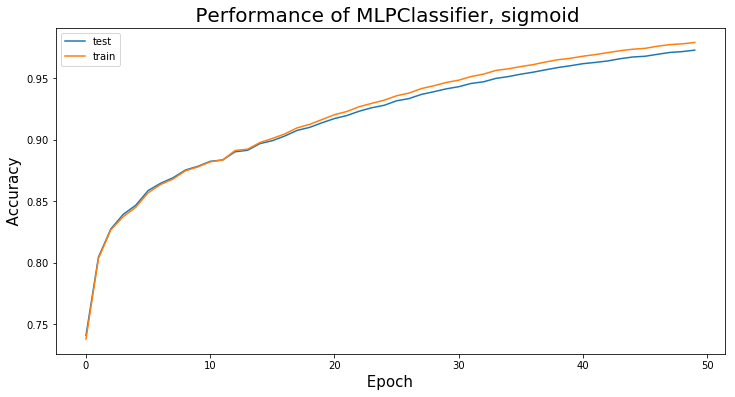

In [8]:
plt.figure(figsize=(12,6))
x = np.arange(50)
plt.plot(x, ann.eval_["valid_preform"], label = "test")
plt.plot(x, ann.eval_["train_preform"], label = "train")
    
plt.title(" Performance of MLPClassifier, sigmoid  ", fontsize = 20)
plt.xlabel(" Epoch ", fontsize=15)
plt.ylabel("  Accuracy  ", fontsize=15)
plt.legend()
plt.savefig("./results/figures/MLPClassifier_MSE_50_epochs.png")

# Comparing to Scikitlearn MLPClassifier

In [9]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(30, ), 
                                 activation='logistic', 
                                 solver='sgd', 
                                 alpha=0.0001, 
                                 batch_size=10, 
                                 learning_rate='constant', 
                                 learning_rate_init=0.0001,
                                 shuffle=True, 
                                 random_state=1)

nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [10]:
y_pred = nn.predict(X_test)

In [11]:
np.sum(y_pred==y_test)/len(y_test)

0.99998461538461536